In [1]:
import MDAnalysis as mda 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
from tqdm import tqdm

In [3]:
pdb_file = '../../pdb/3pbl.pdb' 
traj_file = '../../output.dcd' 

In [6]:
traj_3pbl = mda.Universe(pdb_file, traj_file) 
traj_ref = mda.Universe(pdb_file)

In [4]:
from MDAnalysis.analysis.rms import RMSD

In [8]:
rmsd_3pbl = RMSD(traj_3pbl, traj_ref, 
                 select='protein and name CA', 
                verbose=True) 
rmsd_3pbl.run() 

RMSD  5.77 A at frame  2000/2000  [100.0%]


In [10]:
from MDAnalysis.analysis.distances import self_distance_array 

In [21]:
protein_3pbl_ca = traj_3pbl.select_atoms('protein and name CA') 
cms_u = []
for _ in tqdm(traj_3pbl.trajectory): 
    cm_u = self_distance_array(protein_3pbl_ca.positions) 
    cm_u[cm_u > 20] = 20
    cms_u.append(cm_u)

100%|██████████| 2000/2000 [00:01<00:00, 1520.82it/s]


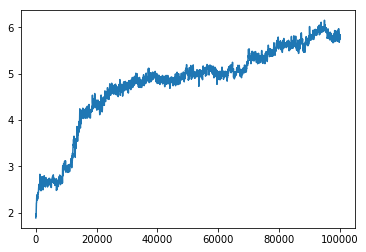

In [9]:
plt.plot(rmsd_3pbl.rmsd[:,1], rmsd_3pbl.rmsd[:,2])

In [15]:
def triu_to_full(cm0):
    num_res = int(np.ceil((len(cm0) * 2) ** 0.5))
    iu1 = np.triu_indices(num_res, 1)

    cm_full = np.zeros((num_res, num_res))
    cm_full[iu1] = cm0
    cm_full.T[iu1] = cm0
    np.fill_diagonal(cm_full, 1)
    return cm_full

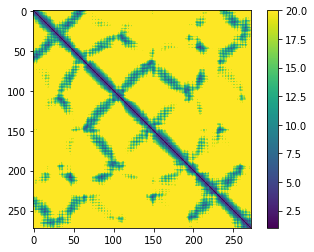

In [22]:
plt.imshow(triu_to_full(cm_u)) 
plt.colorbar() 

In [28]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2, random_state=0) 
pca_cm = pca.fit_transform(cms_u)

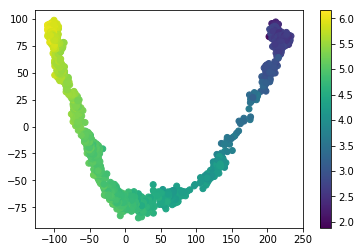

In [37]:
plt.scatter(pca_cm[:,0], pca_cm[:,1], c=rmsd_3pbl.rmsd[:,2]) 
plt.colorbar() 

In [36]:
from sklearn.cluster import KMeans 

In [38]:
kmeans = KMeans(n_clusters=10) 

In [39]:
kmeans.fit(pca_cm) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

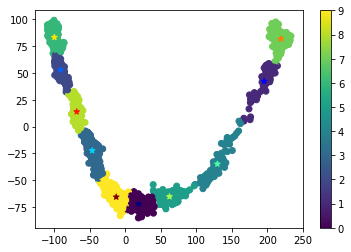

In [48]:
sc = plt.scatter(pca_cm[:,0], pca_cm[:,1], c=kmeans.labels_) 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c=range(10), cmap='jet', marker='*')
plt.colorbar(sc) 

In [49]:
def distance(a, b): 
    pass

In [46]:
for i, center_coor in enumerate(kmeans.cluster_centers_): 
    cluster_points = pca_cm[kmeans.labels_==i] 
    print i, len(cluster_points)

0 183
1 85
2 162
3 392
4 102
5 95
6 310
7 179
8 143
9 349
